In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxopt
cvxopt.solvers.options['show_progress'] = False

In [101]:
data = pd.read_csv("hw2data.csv",header = None) 
# Preview the first 5 lines of the loaded data 
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [102]:
def get_next_train_valid(X_shuffled, y_shuffled, itr, k):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    X_valid = X_shuffled[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k,:]
    Y_valid = y_shuffled[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k]
    
    X_train = np.delete(X_shuffled, np.s_[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k:1], 0)
    Y_train = np.delete(y_shuffled, np.s_[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k:1], 0)
    
    
    return  X_train, Y_train, X_valid, Y_valid

def train_data(X_train, y_train, C):

    R = cvxopt.matrix(X_train.T@np.diag(y_train),tc = 'd')
    P = cvxopt.matrix(np.dot(R.T,R), tc = 'd')
    q = -cvxopt.matrix(np.ones(len(X_train)), tc = 'd')
    G = cvxopt.matrix(np.concatenate((np.eye(len(X_train)),-np.eye(len(X_train)))),tc = 'd')
    h = cvxopt.matrix(np.concatenate((C*np.ones(len(X_train)),np.zeros(len(X_train)))), tc = 'd')
    solution = 
    (P,q,G,h)
    lamda = solution['x']
    W = np.dot(R,lamda)
    return W

def predict(X_valid, W ):
    return np.sign(np.dot(X_valid,W))

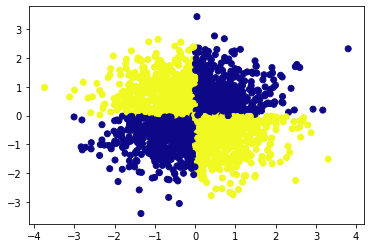

In [103]:
samples = np.array(data)
#shuffle [X,y]
np.random.shuffle(samples)

flag = len(samples)//5
  
X_learn = samples[flag:,:-1]
X_test = samples[:flag,:-1]
y_learn = samples[flag:,-1]
y_test = samples[:flag,-1]
#print(X_train)
plt.scatter(samples[:,0],samples[:,1],c= samples[:,2] ,cmap='plasma')
plt.show()


In [104]:
k = 10

C_set =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_valid = np.zeros(k)
score_train = np.zeros(k)

mean_score_valid =np.zeros(len(C_set))
mean_score_train =np.zeros(len(C_set))
score_test = np.zeros(len(C_set))
W = np.zeros(2)

for j in range(len(C_set)):
        for i in range(k):
            
            X_train, y_train, X_valid, y_valid = get_next_train_valid(X_learn , y_learn, i , k)
            
            W = train_data(X_train, y_train, C_set[j])
            
            y_predict_train = predict(X_train, W)
            y_predict = predict(X_valid, W)
            y_predict_train = np.reshape(y_predict_train,len(X_train))
            y_predict = np.reshape(y_predict,len(X_valid))

            score_train[i] = 1- 0.5* np.sum(np.absolute(y_train - y_predict_train))/len(X_train)
            score_valid[i] = 1- 0.5* np.sum(np.absolute(y_valid - y_predict))/len(X_valid)
            
        mean_score_valid[j] = np.mean(score_train)
        mean_score_train[j] = np.mean(score_valid)
        
        #train on full training set
        W = train_data(X_learn, y_learn, C_set[j])
        y_test_predict = np.reshape(predict(X_test, W),len(y_test))
        score_test[j] = 1- 0.5* np.sum(np.absolute(y_test_predict - y_test))/len(X_test)


In [105]:
print(mean_score_valid)
print(mean_score_train)
print(score_test)

[0.50881944 0.50881944 0.50930556 0.508125   0.508125   0.508125
 0.508125   0.508125  ]
[0.5025   0.5025   0.503125 0.505625 0.50375  0.504375 0.504375 0.504375]
[0.5125 0.5125 0.4975 0.495  0.4975 0.4975 0.4975 0.4975]


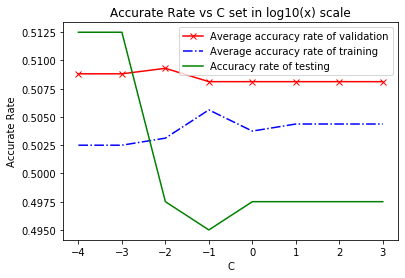

In [107]:
plt.xlabel('C')
plt.ylabel('Accurate Rate')
plt.title("Accurate Rate vs C set in log10(x) scale")
plt.plot(np.log10(C_set),  mean_score_valid, 'r-x',label = 'Average accuracy rate of validation')   
plt.plot(np.log10(C_set),  mean_score_train, 'b-.',label = 'Average accuracy rate of training')  
plt.plot(np.log10(C_set), score_test, 'g-', label = 'Accuracy rate of testing')
plt.legend()